## 2024-7-14
看了吴恩达的机器学习，随便找了点资料开写。

numpy的库够用，但目的不只是为了解题，还有可视化。

作业是2014年版本的，用的matlab，但现在2024年了，我们肯定需要用个新一点的版本。

这里翻译一下相关的文档。

- ex1data1.txt 为单变量线性回归数据集
- ex1data2.txt 为多变量线性回归数据集

任务的需求是用单变量线性回归模型去预测快餐车的盈利。
第一列为城市的人口，第二列为盈利。

In [81]:
# 导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 读取相关数据
data = pd.read_csv('ex1data1.txt', header=None, names=["Population", "Profit"])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<AxesSubplot:xlabel='Population', ylabel='Profit'>

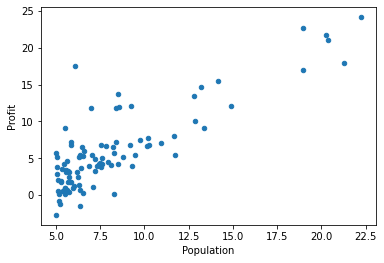

In [15]:
data.plot('Population', 'Profit', kind='scatter')

来点函数

In [126]:
def computeCost(X, y, w, b):
    m = len(y)
    return np.sum(np.power((X * w + b - y), 2))/(2 * m)

设定初始值

In [85]:
X = data.iloc[:, 0]
y = data.iloc[:, 1]

In [86]:
# 转化X和y为narray
X = np.matrix(X.values).T
y = np.matrix(y.values).T

In [120]:
w = np.matrix([[0]])
b = 0.0

In [88]:
# 测试代价函数
computeCost(X, y, w, b)

32.072733877455676

$$ w = w - \alpha \frac{\partial}{\partial w}{J(w, b)} $$
$$ b = b - \alpha \frac{\partial}{\partial b}{J(w, b)} $$

In [125]:
# 批量梯度下降函数
def gradientDescent(X, y, w, b, alpha, iters):
    cost = np.zeros(iters)
    m = len(y)
    for i in range(iters):
        error = X * w + b - y
        w = w - alpha * (X.T * error) / m
        b = b - alpha * np.mean(error)

        cost[i] = computeCost(X, y, w, b)
    return w, b, cost




In [72]:
alpha = 0.01
iters = 1000

In [121]:
w, b, cost = gradientDescent(X, y, w, b, alpha, iters)

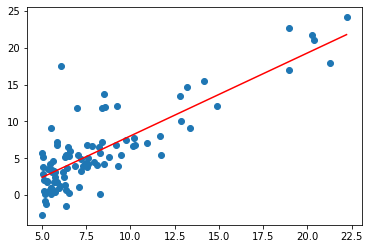

In [122]:
plt.scatter(np.array(X), np.array(y))
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = X_fit * w + b
plt.plot(X_fit, y_fit, color="red")

In [77]:
cost = pd.Series(cost)

<AxesSubplot:>

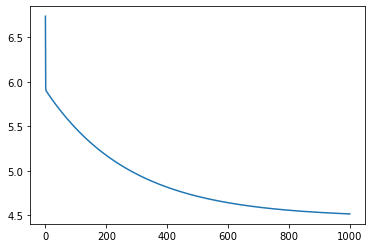

In [78]:
cost.plot()

接下来是多变量线性函数回归
任务要求预测房价，第一列参数为房子大小，第二列参数为房间数量，第三列参数为房子价格。

In [109]:
# 先读取数据
data = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Rooms', 'Prices'])
data.head()

,Size,Rooms,Prices
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [106]:
data.describe()

,Size,Rooms,Prices
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


显然我们需要对数据进行标准化，方法就直接抄答案了。

In [115]:
data = (data - data.mean()) / data.std()
data.head()

,Size,Rooms,Prices
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [116]:
data.describe()

,Size,Rooms,Prices
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.889741e-17,-3.425156e-17,-2.125959e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


In [123]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [124]:
X = np.matrix(X.values)
y = np.matrix(y.values).T

In [128]:
w = np.matrix([[0.0], [0.0]])
b = 0.0

In [129]:
computeCost(X, y, w, b)

0.48936170212765967

In [130]:
alpha = 0.01
iters = 1000

In [131]:
w, b, cost = gradientDescent(X, y, w, b, alpha, iters)

<AxesSubplot:>

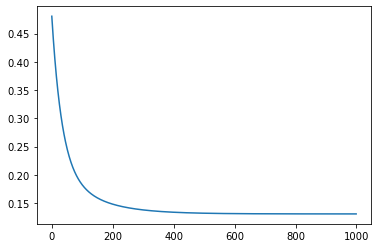

In [132]:
pd.Series(cost).plot()
w